<a href="https://colab.research.google.com/github/Martinxmaina/Data-science/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [17]:
file_path = '/content/drive/MyDrive/titanic.csv'
titanic = pd.read_csv(file_path)

In [18]:
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

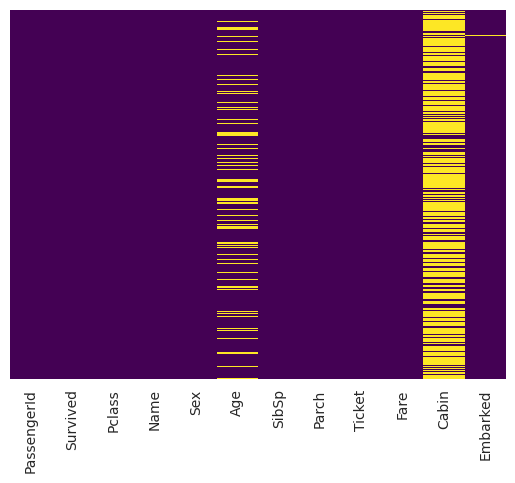

In [22]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

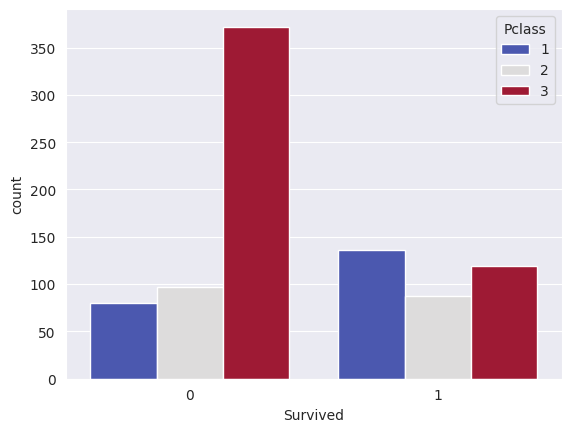

In [23]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=titanic, palette="coolwarm", hue='Pclass')

<Axes: xlabel='count'>

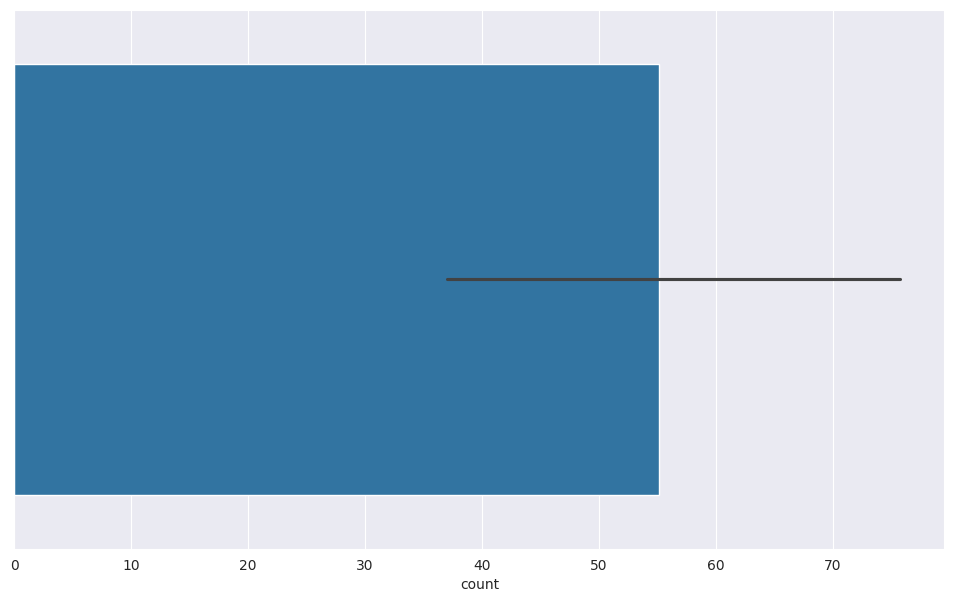

In [24]:
plt.figure(figsize=(12, 7))
sns.barplot(x=np.round(((titanic[titanic["Survived"]==0]["Pclass"].value_counts())/(titanic["Pclass"].value_counts())*100), 2))

In [26]:
plt.figure(figsize=(12, 7))

X=np.round(((titanic[titanic["Survived"]==0]["Pclass"].value_counts())/(titanic["Pclass"].value_counts())*100), 2).index, Y=np.round(((titanic[titanic["Survived"]==0]["Pclass"].value_counts())/(titanic["Pclass"].value_counts())*100), 2).values
plt.bar(X, Y)

ValueError: too many values to unpack (expected 2)

<Figure size 1200x700 with 0 Axes>

<BarContainer object of 3 artists>

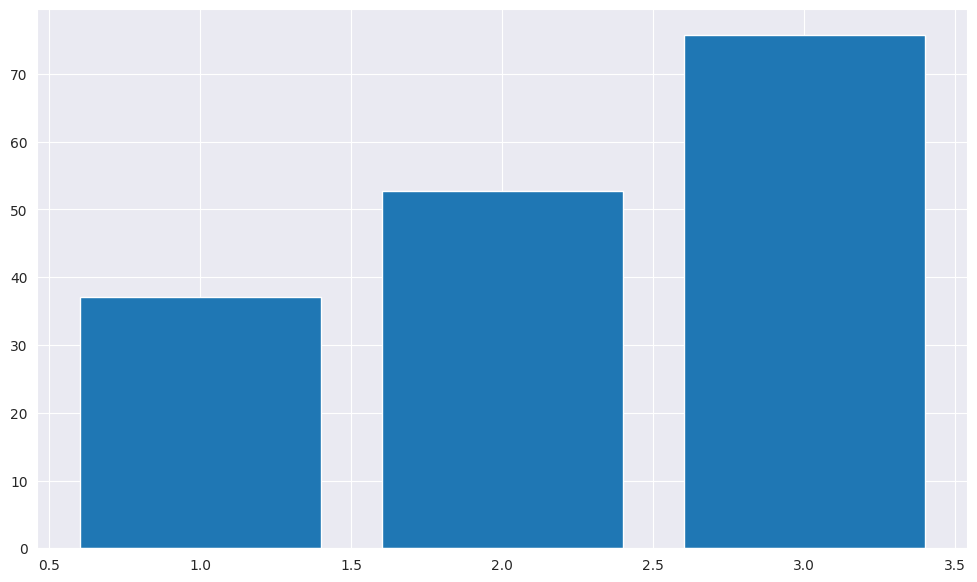

In [27]:
plt.figure(figsize=(12, 7))

percentages = np.round(((titanic[titanic["Survived"]==0]["Pclass"].value_counts())/(titanic["Pclass"].value_counts())*100), 2)
X = percentages.index
Y = percentages.values

# Plot the bar chart
plt.bar(X, Y)


<Axes: >

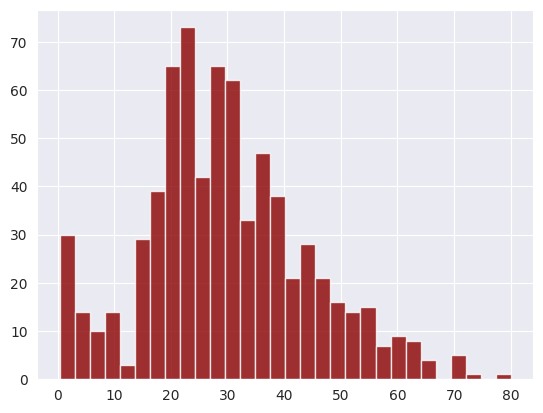

In [28]:
titanic["Age"].hist(bins=30, color="darkred", alpha=0.8)

In [29]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
titanic['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


<Axes: xlabel='SibSp', ylabel='count'>

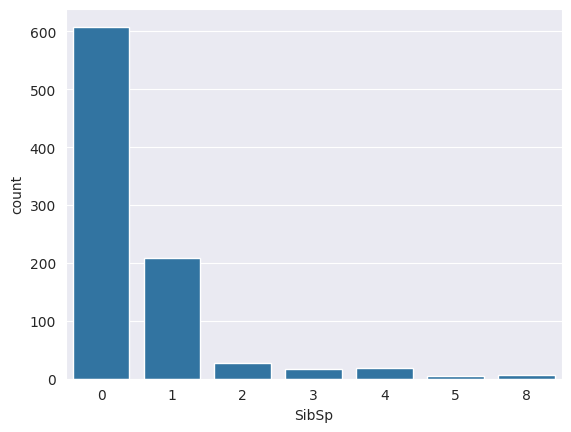

In [31]:
sns.countplot(x='SibSp',data=titanic)

<Axes: xlabel='Fare'>

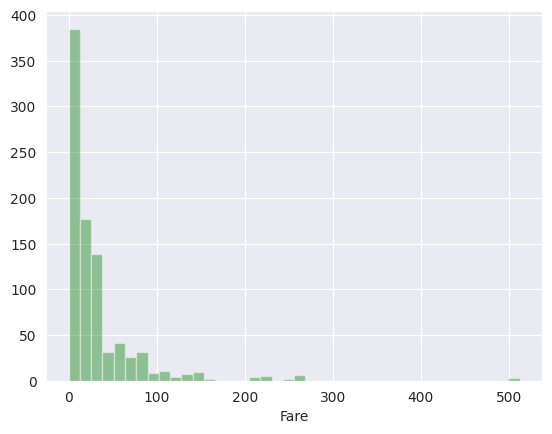

In [32]:
sns.distplot(titanic['Fare'],color='green',bins=40,kde=False)

# Imputation

In [78]:
np.round(titanic[titanic['Pclass']==1]['Age'].astype(float).mean(),2)

38.23

In [79]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 38.23
        elif Pclass == 2:
            return 29.88
        else:
            return 25.14
    else:
        return Age

In [80]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

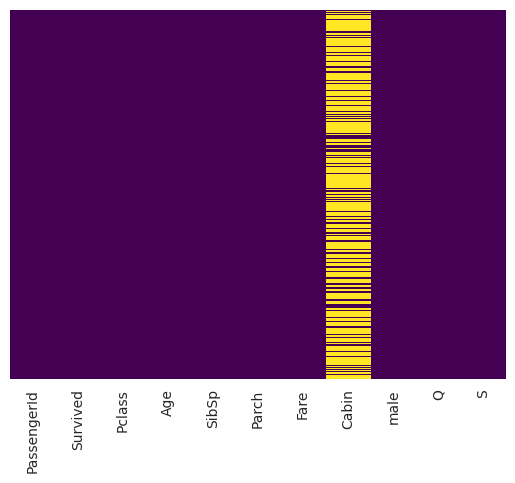

In [81]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [82]:
titanic = titanic.drop('Cabin',axis=1)

<Axes: >

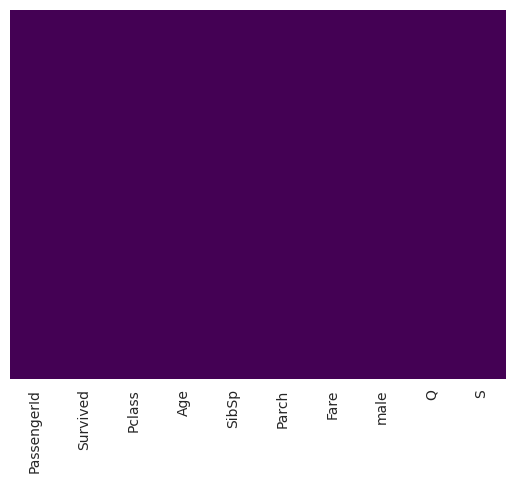

In [83]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [38]:
titanic.dropna(inplace=True)

<Axes: >

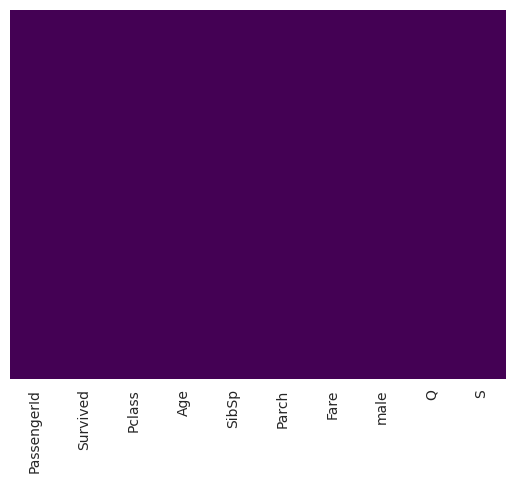

In [84]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [36]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
# Cell 100 - Removed and replaced with the code below

# Cell 103 (original code) - Create dummy variables
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
embark = pd.get_dummies(titanic['Embark'],drop_first=True)

# Cell 104 - Concatenate dummy columns
titanic = pd.concat([titanic, sex, embark], axis=1)

# Cell 105 - Drop original columns
titanic = titanic.drop(['Sex', 'Embark'], axis=1)

# Now select desired columns (Replaced original Cell 100)
titanic = titanic[['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'male', 'Q', 'S']]

KeyError: 'Embark'

In [44]:
titanic = pd.concat([titanic, sex, embark], axis=1)

NameError: name 'embark' is not defined

In [ ]:
titanic = titanic.drop(columns=sex.columns.tolist() + embark.columns.tolist())

In [49]:
titanic=titanic.drop("Embarked", axis =1)

In [50]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500


In [62]:
file_path = '/content/drive/MyDrive/titanic (1).csv'
titanic_backup = pd.read_csv(file_path)


In [63]:
titanic['Embarked'] = titanic_backup['Embarked']

In [64]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
embarked= pd.get_dummies(titanic["Embarked"], drop_first=True)

KeyError: 'Embarked'

In [71]:
titanic = pd.concat([titanic, sex, embarked], axis=1)

In [72]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,False,True


In [95]:
titanic= titanic.drop(["Sex", "Ticket", "Embarked", "Name"], axis=1)

KeyError: "['Sex', 'Ticket', 'Embarked', 'Name'] not found in axis"

In [85]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [93]:
print(titanic['S'].unique())

titanic['S'] = titanic['S'].map({True: 1, False: 0})

[nan]


In [94]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,NaN,NaN,NaN
1,2,1,1,38.0,1,0,71.2833,NaN,NaN,NaN
2,3,1,3,26.0,0,0,7.9250,NaN,NaN,NaN
3,4,1,1,35.0,1,0,53.1000,NaN,NaN,NaN
4,5,0,3,35.0,0,0,8.0500,NaN,NaN,NaN
